In [4]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt
import folium

In [ ]:
# API Key
api_key = "3sAEbbB4m1usrLLgLuNsjLVcb4fLfKLnBB4QDuee"

# requset URL
url = f"https://developer.nrel.gov/api/alt-fuel-stations/v1.json?api_key={api_key}&fuel_type=ELEC&state=CA"

# issue a request
response = requests.get(url)

# Check response status
if response.status_code == 200:
    data = response.json()
    # Save as JSON file
    with open('alt_fuel_stations.json', 'w') as f:
        json.dump(data, f, indent=4)
    print("The data is successfully downloaded and saved as alt_fuel_stations.json")
else:
    print(f"Request failed, status code: {response.status_code}, error message: {response.text}")


In [ ]:
# request CSV data
csv_url = f"https://developer.nrel.gov/api/alt-fuel-stations/v1.csv?api_key={api_key}&fuel_type=ELEC&state=CA"
df = pd.read_csv(csv_url)

df.to_csv('alt_fuel_stations1.csv', index=False)
print("The data is successfully downloaded and saved as alt_fuel_stations.csv")


In [5]:
# Load the CSV files
ev_file_path = 'alt_fuel_stations.csv'
sdge_file_path = 'SDGE-ELEC-2024-Q3.csv'

ev_chargers_df = pd.read_csv(ev_file_path)
sdge_data_df = pd.read_csv(sdge_file_path)



/var/folders/xc/6jdw4jhn5_79w695j45v4rtr0000gn/T/ipykernel_22834/1340694635.py:5: DtypeWarning: Columns (6,7,19,20,24,30,31,35,36,40,46,63,69,71,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  ev_chargers_df = pd.read_csv(ev_file_path)


In [6]:
# Extract unique ZipCodes from the SDGE data to use for matching
sdge_zip_codes = sdge_data_df['ZipCode'].unique()

# Filter the EV chargers data using the ZipCodes from the SDGE service area
ev_chargers_in_sdge_area = ev_chargers_df[ev_chargers_df['ZIP'].isin(sdge_zip_codes)]

# Count the number of EV chargers in the SDGE service area based on ZipCodes
num_ev_chargers_in_sdge_area = ev_chargers_in_sdge_area.shape[0]

# Display the result
print(f'The number of EV chargers in the SDG&E service area is: {num_ev_chargers_in_sdge_area}')


The number of EV chargers in the SDG&E service area is: 1122


In [7]:
# Convert 'Open Date' to datetime and extract the year
ev_chargers_df['Open Date'] = pd.to_datetime(ev_chargers_df['Open Date'], errors='coerce')  # Convert to datetime, errors as NaT
ev_chargers_df['Open Year'] = ev_chargers_df['Open Date'].dt.year  # Extract the year

# Group by year to count the number of stations opened each year
stations_per_year = ev_chargers_df.groupby('Open Year').size().reset_index(name='Number of Stations Opened')

In [8]:
stations_per_year

,Open Year,Number of Stations Opened
0,1995.0,1
1,1997.0,6
2,1998.0,14
3,1999.0,12
4,2000.0,3
5,2002.0,17
6,2004.0,15
7,2005.0,3
8,2006.0,3
9,2007.0,1


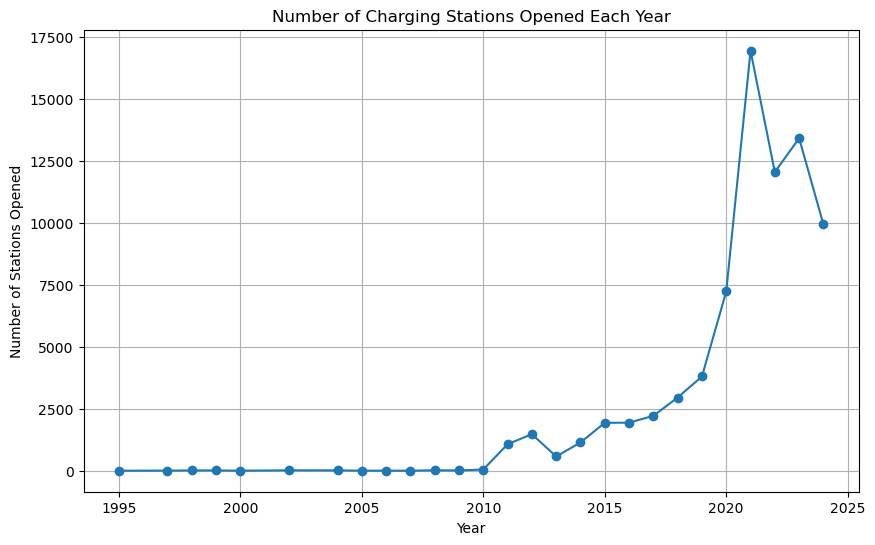

In [9]:
# Plot the time series of stations opened each year
plt.figure(figsize=(10, 6))
plt.plot(stations_per_year['Open Year'], stations_per_year['Number of Stations Opened'], marker='o')
plt.title('Number of Charging Stations Opened Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Stations Opened')
plt.grid(True)
plt.show()



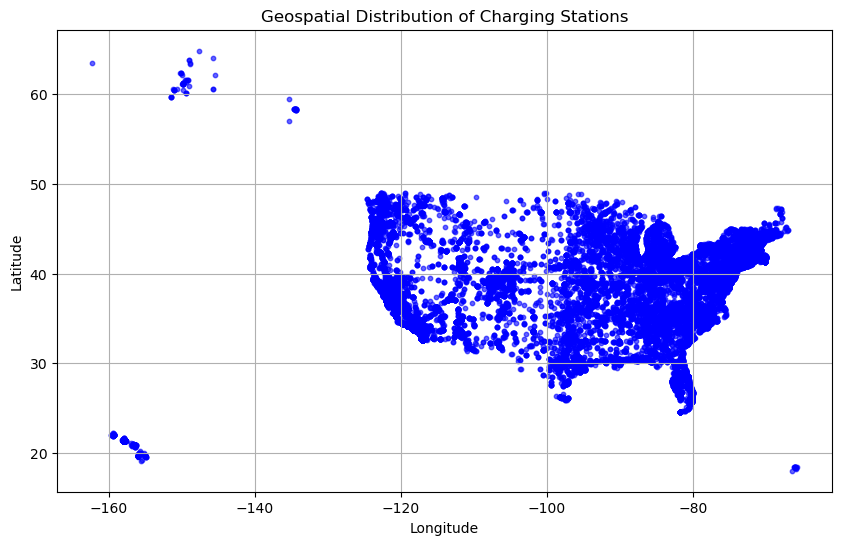

In [10]:
# Geospatial plot: using Latitude and Longitude columns
# Clean the data to remove rows with missing or non-numeric values in Latitude and Longitude

ev_chargers_df_geo_clean = ev_chargers_df.dropna(subset=['Latitude', 'Longitude']).copy()  # Make an explicit copy
ev_chargers_df_geo_clean.loc[:, 'Latitude'] = pd.to_numeric(ev_chargers_df_geo_clean['Latitude'], errors='coerce')
ev_chargers_df_geo_clean.loc[:, 'Longitude'] = pd.to_numeric(ev_chargers_df_geo_clean['Longitude'], errors='coerce')

# Simple scatter plot of geospatial data
plt.figure(figsize=(10, 6))
plt.scatter(ev_chargers_df_geo_clean['Longitude'], ev_chargers_df_geo_clean['Latitude'], c='blue', alpha=0.6, s=10)
plt.title('Geospatial Distribution of Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [16]:
ev_chargers_df.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

In [20]:
ev_chargers_df['Latitude']

0        34.248319
1        34.040539
2        34.059133
3        33.759802
4        33.770508
           ...    
82601    34.017749
82602    34.019075
82603    34.019861
82604    38.733819
82605    35.956303
Name: Latitude, Length: 82606, dtype: object

In [27]:
# Re-import necessary libraries in case of environment reset

# Load the dataset again
alt_fuel_stations = ev_chargers_in_sdge_area

# Filter out rows with non-numeric Latitude and Longitude values
alt_fuel_stations_clean = alt_fuel_stations[pd.to_numeric(alt_fuel_stations['Latitude'], errors='coerce').notnull() & 
                                            pd.to_numeric(alt_fuel_stations['Longitude'], errors='coerce').notnull()]

# Convert Latitude and Longitude columns to numeric
alt_fuel_stations_clean['Latitude'] = pd.to_numeric(alt_fuel_stations_clean['Latitude'])
alt_fuel_stations_clean['Longitude'] = pd.to_numeric(alt_fuel_stations_clean['Longitude'])

# Create a GeoDataFrame for all EV charging stations
all_ev_stations_gdf = gpd.GeoDataFrame(
    alt_fuel_stations_clean,
    geometry=gpd.points_from_xy(alt_fuel_stations_clean.Longitude, alt_fuel_stations_clean.Latitude),
    crs="EPSG:4326"
)

# Plotting all EV charging stations using Folium
all_ev_map = folium.Map(location=[32.7157, -117.1611], zoom_start=10)
for _, row in all_ev_stations_gdf.iterrows():
    popup_text = f"""
    <b>Station Name:</b> {row['Station Name']}<br>
    <b>Street Address:</b> {row['Street Address']}<br>
    <b>City:</b> {row['City']}<br>
    <b>ZIP Code:</b> {row['ZIP']}<br>
    <b>Fuel Type:</b> {row['Fuel Type Code']}<br>
    <b>EV Network:</b> {row['EV Network']}<br>
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(all_ev_map)


# Save and display map for all EV charging stations
all_ev_map.save('all_ev_stations_map.html')
all_ev_map
